In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, \
                            recall_score, accuracy_score, plot_confusion_matrix,\
                            plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Random Forests with sklearn

In this sprint we will be practicing using the scikit-learn implementation of random forests. For this exercise, we'll be attempting to classify whether a **customer churns or not** given a set of inputs. We can use the Random Forest to get more insight into the churn data. 

    Only about 15% of the data points are positive for churn.

The documentation for sklearn's random forest can be found here: [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


You might find the documentation for these sklearn functions helpful: [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) and [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Each row represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

1. Load the data/churn.csv file into a pandas DataFrame.

In [2]:
churn_df = pd.read_csv('../data/churn.csv')

In [3]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
churn_df['Churn?'].unique()

array(['False.', 'True.'], dtype=object)

2. Convert the "no", "yes" values to booleans (True/False) as well as any booleans that are stored as strings.


In [5]:
churn_df["Int'l Plan"] = (churn_df["Int'l Plan"] == 'yes')*1
churn_df["VMail Plan"] = (churn_df["VMail Plan"] == 'yes')*1
churn_df['Churn?'] = (churn_df['Churn?'] == 'True.')*1

In [6]:
churn = churn_df.copy()

3. Remove the features which aren't continuous or boolean.


In [7]:
churn.pop('State')
churn.pop('Area Code')
churn.pop('Phone')

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: Phone, Length: 3333, dtype: object

In [8]:
churn

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


4. Make a numpy array called y containing the churn values.

In [9]:
y= churn['Churn?'].values

5. Make a 2 dimensional numpy array containing the feature data (everything except the labels) called X.

In [10]:
X = churn.drop(['Churn?'], axis = 1).values

In [11]:
X

array([[128.  ,   0.  ,   1.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  ,   0.  ,   1.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  ,   0.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 28.  ,   0.  ,   0.  , ...,   6.  ,   3.81,   2.  ],
       [184.  ,   1.  ,   0.  , ...,  10.  ,   1.35,   2.  ],
       [ 74.  ,   0.  ,   1.  , ...,   4.  ,   3.7 ,   0.  ]])

6. 

Use sklearn's train_test_split to split into train and test set.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)



7. Use sklearn's RandomForestClassifier to build a model of your data. Start by using the defaults for all of the parameters.


In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()



8. What is the accuracy score on the test data?


In [14]:
y_hat = rf.predict(X_test)
print(accuracy_score(y_test, y_hat),rf.score(X_test, y_test))
#note the accuracy score is the same as the random forest .score method

0.9544364508393285 0.9544364508393285


9. Draw a confusion matrix for the results.

In [15]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[712,   5],
       [ 33,  84]])

10. 

What are the precision and recall?


In [16]:
p = precision_score(y_test, y_hat)
r = recall_score(y_test, y_hat)
p,r

(0.9438202247191011, 0.717948717948718)



11. Build the RandomForestClassifier again setting the out of bag parameter -- oob_score to be True. Compare the out of bag score of the training set with the accuracy on the test set. How close are they?

    It might complain that you are using too few trees to reliably use out of bag score. You can still see the results, but try increasing the number of trees as well to remove the warning.


In [17]:
rf1 = RandomForestClassifier(oob_score=True)
rf1.fit(X_train, y_train)
rf1.score(X_test,y_test), rf1.oob_score_

#oob score is very close but not as good as test set accuracy

(0.9520383693045563, 0.9511804721888756)

12. Say you would like to give advice for what to focus on to prevent churn. You would like to be able to say what specifics about a user you should focus on changing in order to make them not churn. Use sklearn's model to get the feature importances. What are the top five features? What could you do to potentially limit churn?

In [ ]:
rf1.feature_importances_

13. 

Try modifying the number of trees. The default is 10 trees. Try 5-10 different values for the number of trees and make a graph of the number of trees versus the accuracy score. Is there a point where creating more trees doesn't seem to help anymore?

If you get an inconsistent graph, try creating a few random forests for each number and averaging them. This should smooth out your graph.


Text(0, 0.5, 'Accuracy')

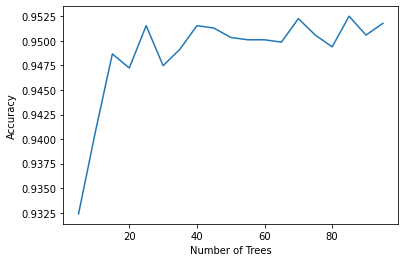

In [44]:
n_estimators = range(5, 100, 5)
accs = []
for n_trees in n_estimators:
    total_accs = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n_trees)
        rf.fit(X_train, y_train)
        total_accs += rf.score(X_test, y_test)
    accs.append(total_accs/5)

fig, ax = plt.subplots()
ax.plot(n_estimators, accs)
ax.set_xlabel("Number of Trees")
ax.set_ylabel('Accuracy')

14. Try modifying the max features parameter. The default is using sqrt(total # of features). Try all the different possible values (1 to the total number of features) and make a graph of the number of features versus the accuracy score. Is there a point where using additional features doesn't seem to help?

Text(0, 0.5, 'Accuracy')

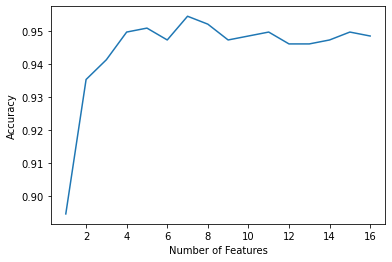

In [45]:
# n_estimators = range(5, 100, 5)
accs = []
total_features = X_train.shape[1] - 1

for f in range(1, total_features+1):
    rf = RandomForestClassifier(max_features=f, n_estimators = 25)
    rf.fit(X_train, y_train)
    accs.append(rf.score(X_test, y_test))
    
fig, ax = plt.subplots()
ax.plot(np.arange(1,total_features+1), accs)
ax.set_xlabel("Number of Features")
ax.set_ylabel('Accuracy')

#4-5 features seems to be plenty

15. Run all the other classifiers that we have learned so far in class (logistic regression, decision tree, k nearest neighbors) using sklearn's default parameters for all of them. You can use the optimal parameters you found above for Random Forest. If you have time, you can tune the other models as well. Which gets the highest accuracy? Precision? Recall?

In [53]:
def score_model(m, X_train, y_train, X_test, y_test, **kwargs):
    model = m(**kwargs)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    return accuracy_score(y_test, y_hat), precision_score(y_test, y_hat), recall_score(y_test, y_hat)

print("Logistic Regression:", score_model(LogisticRegression,X_train, y_train, X_test, y_test))
print("Decision Tree:", score_model(DecisionTreeClassifier, X_train, y_train, X_test, y_test, max_depth = 3))
print("KNN:", score_model(KNeighborsClassifier, X_train, y_train, X_test, y_test))
print("Random Forest:", score_model(RandomForestClassifier, X_train, y_train, X_test, y_test, n_estimators=25, max_features=4))

#Random Forest: (0.947242206235012, 0.9294117647058824, 0.6752136752136753) (BEST!!!)

Logistic Regression: (0.8573141486810552, 0.4722222222222222, 0.1452991452991453)
Decision Tree: (0.9088729016786571, 0.9019607843137255, 0.39316239316239315)
KNN: (0.8693045563549161, 0.5869565217391305, 0.23076923076923078)
Random Forest: (0.947242206235012, 0.9294117647058824, 0.6752136752136753)


/home/heather/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


16. Use the included plot_roc function to visualize the roc curve of each model. Note that you can pass parameters like this:

 plot_roc(X, y, RandomForestClassifier, n_estimators=20)

Which model would you choose if I'm okay with a recall of 0.2?

/home/heather/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


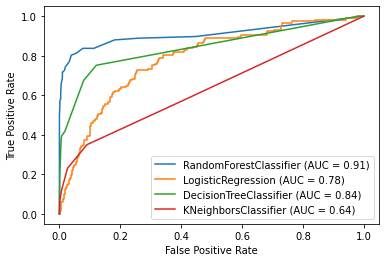

In [61]:
rf = RandomForestClassifier(max_features=f, n_estimators = 25)
rf.fit(X_train, y_train)

lg = LogisticRegression()
lg.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

fig, ax = plt.subplots()
plot_roc_curve(rf, X_test, y_test, ax = ax)
plot_roc_curve(lg, X_test, y_test, ax = ax)
plot_roc_curve(dt, X_test, y_test, ax = ax)
plot_roc_curve(KNN, X_test, y_test, ax = ax);

17. Plot the feature importances as described in the lecture notes. Recall that RandomForestClassifier is a ensemble of many trees, and each individual tree will attribute different importances to different features. Extend the feature importance code to find the standard deviation of the importance for each feature across all trees. Add error bars to your chart, where the width of the bars is the equal to the standard deviation for that feature.


Feature ranking:
(1, 'Day Charge', 0.14511989239300463)
(2, 'Day Mins', 0.12336384079489239)
(3, 'CustServ Calls', 0.11825685769877634)
(4, 'Eve Mins', 0.0813261526361697)
(5, 'Intl Calls', 0.07997891093142506)
(6, 'Eve Charge', 0.06869418861471838)
(7, "Int'l Plan", 0.06783209476078253)
(8, 'Intl Charge', 0.052893622816861934)
(9, 'Intl Mins', 0.038025740643603465)
(10, 'VMail Message', 0.036645036426956164)
(11, 'Night Mins', 0.03205800929839073)
(12, 'Night Charge', 0.030671803445576993)
(13, 'VMail Plan', 0.02855931919664938)
(14, 'Night Calls', 0.027442368080699605)
(15, 'Account Length', 0.025491706862515656)
(16, 'Day Calls', 0.022578237128525948)
(17, 'Eve Calls', 0.021062218270451124)


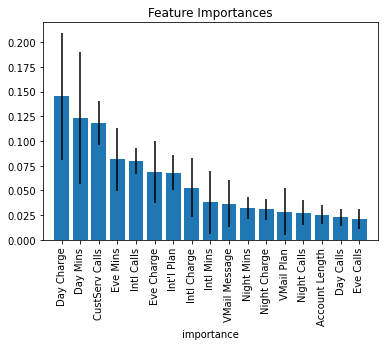

In [79]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(churn.iloc[:,:-1].columns[indices])

# Print the feature ranking
print("Feature ranking:")

for f in range(len(features)):
    print((f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()
ax.bar(range(len(features)), importances[indices], yerr=std[indices], align="center")
ax.set_xticks(range(len(features)))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, len(features)])
ax.set_xlabel("importance")
ax.set_title("Feature Importances");